In [106]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [87]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [88]:
class_names =['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [89]:
train_images.shape

(50000, 32, 32, 3)

In [90]:
len(train_labels)

50000

In [91]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [92]:
test_images.shape

(10000, 32, 32, 3)

In [93]:
len(test_labels)

10000

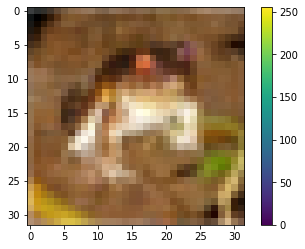

In [94]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [95]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## ResNet50

In [102]:
res = ResNet50(weights ='imagenet', include_top = False, 
               input_shape =(32, 32, 3)) 
res.trainable=False

x = res.output

x = GlobalAveragePooling2D()(x)

x = BatchNormalization()(x)

x = Dropout(0.5)(x) 
x = Dense(512, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)


x = Dense(10, activation ='softmax')(x)

model = Model(res.input, x)

model.compile(optimizer ='Adam', 
              loss ='sparse_categorical_crossentropy', 
              metrics =['sparse_categorical_accuracy']) 


In [ ]:
model.fit(train_images,train_labels,epochs=7,validation_data=(test_images,test_labels))
model.evaluate(test_images,test_labels)

## MobileNet

In [109]:
mob = MobileNet(weights ='imagenet', include_top = False, 
               input_shape =(32, 32, 3)) 
mob.trainable=False

x = mob.output

x = GlobalAveragePooling2D()(x)

x = BatchNormalization()(x)

x = Dropout(0.5)(x) 
x = Dense(512, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)


x = Dense(10, activation ='softmax')(x)

model = Model(mob.input, x)

model.compile(optimizer ='Adam', 
              loss ='sparse_categorical_crossentropy', 
              metrics =['sparse_categorical_accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=7,validation_data=(test_images,test_labels))
model.evaluate(test_images,test_labels)

## VGG16

In [111]:
vgg = VGG16(weights ='imagenet', include_top = False, 
               input_shape =(32, 32, 3)) 
vgg.trainable=False

x = vgg.output

x = GlobalAveragePooling2D()(x)

x = BatchNormalization()(x)

x = Dropout(0.5)(x) 
x = Dense(512, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)


x = Dense(10, activation ='softmax')(x)

model = Model(vgg.input, x)

model.compile(optimizer ='Adam', 
              loss ='sparse_categorical_crossentropy', 
              metrics =['sparse_categorical_accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=7,validation_data=(test_images,test_labels))
model.evaluate(test_images,test_labels)